In [7]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [8]:
df_all = pd.read_csv('tiobeindex2.csv')
df = df_all[['Month','Python']]
df.head()

,Month,Python
0,2001-06,1.25
1,2001-07,1.13
2,2001-08,1.20
3,2001-09,1.17
4,2001-10,1.28


22:22:58 - cmdstanpy - INFO - Chain [1] start processing
22:22:58 - cmdstanpy - INFO - Chain [1] done processing


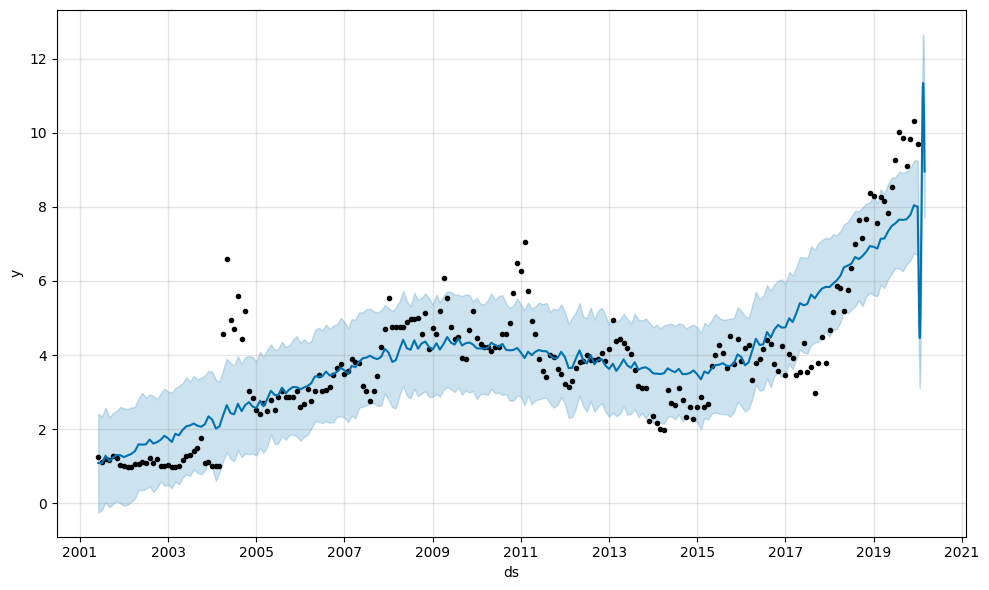

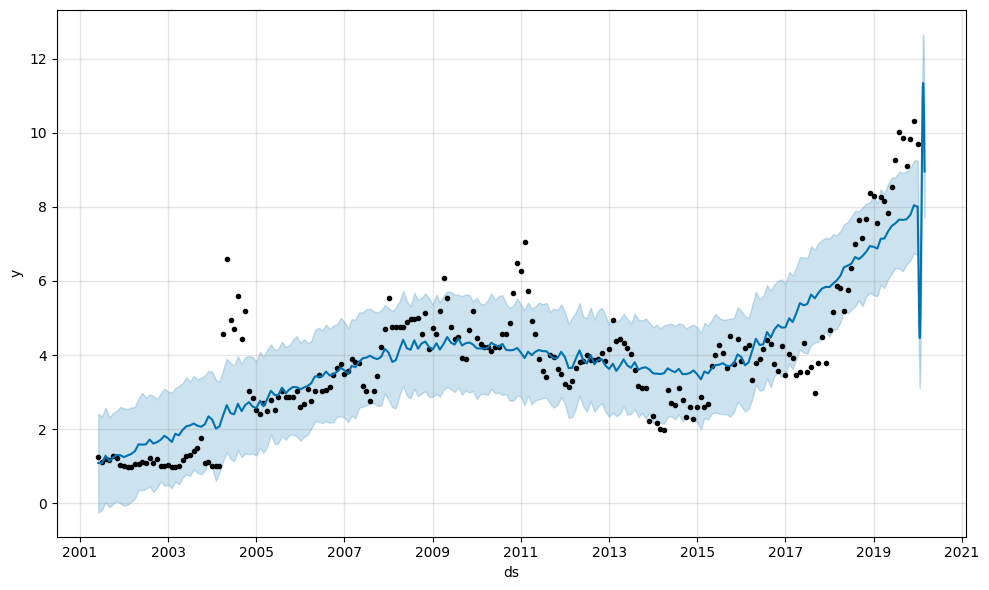

In [9]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

prophet_df = train.reset_index(drop=True)
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Plot
prophet_model.plot(forecast)

In [10]:
test_df = test.reset_index(drop=True)
test_df.columns = ['ds', 'y']  

forecast_test = forecast[-len(test):] 

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 5.599430396582288
MSE: 37.56363600111306
RMSE: 6.12891801226881


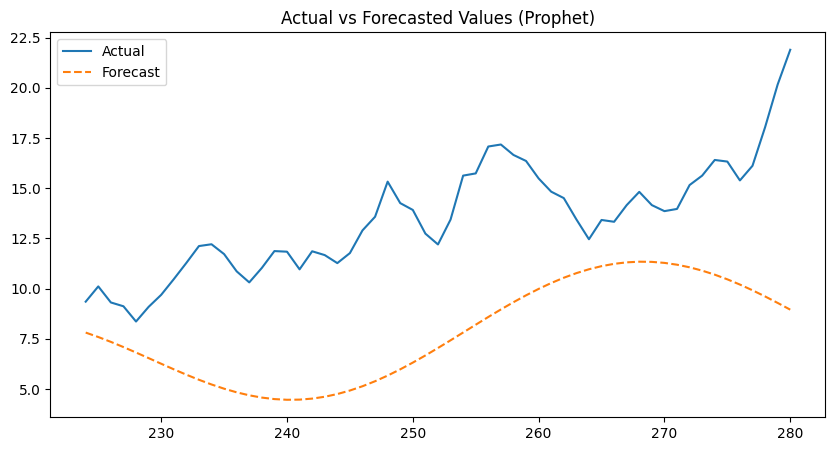

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_df['y'], label='Actual')
plt.plot(test.index, forecast_test['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Prophet)")
plt.show()

In [12]:
languages = list(df_all.columns)
languages.remove('Month')

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in languages:
    df1=df_all[['Month', language]]
    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    prophet_df = train.reset_index(drop=True)
    prophet_df.columns = ['ds', 'y']

    prophet_model = Prophet()
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=len(test))
    forecast = prophet_model.predict(future)

    test_df = test.reset_index(drop=True)
    test_df.columns = ['ds', 'y']  

    forecast_test = forecast[-len(test):] 

    mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
    mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_prophet.csv',index=False)


22:23:00 - cmdstanpy - INFO - Chain [1] start processing
22:23:00 - cmdstanpy - INFO - Chain [1] done processing
22:23:01 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5.599430396582288
MSE: 37.56363600111306
RMSE: 6.12891801226881


22:23:01 - cmdstanpy - INFO - Chain [1] done processing


MAE: 4.3948621272870545
MSE: 23.088587205250224
RMSE: 4.805058501751069


22:23:01 - cmdstanpy - INFO - Chain [1] start processing
22:23:01 - cmdstanpy - INFO - Chain [1] done processing


MAE: 5.7952385025900535
MSE: 47.02643302275267
RMSE: 6.857582155742115


22:23:02 - cmdstanpy - INFO - Chain [1] start processing
22:23:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2.154972289736676
MSE: 6.941994700475815
RMSE: 2.634766536237284


22:23:02 - cmdstanpy - INFO - Chain [1] start processing
22:23:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 4.582783901677917
MSE: 24.24778781579569
RMSE: 4.924204282500441


22:23:03 - cmdstanpy - INFO - Chain [1] start processing
22:23:03 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.43893448621324305
MSE: 0.2760260477043271
RMSE: 0.5253818113565858


22:23:03 - cmdstanpy - INFO - Chain [1] start processing
22:23:03 - cmdstanpy - INFO - Chain [1] done processing
22:23:04 - cmdstanpy - INFO - Chain [1] start processing


MAE: 1.578643181174353
MSE: 4.121326047673717
RMSE: 2.030104935138506


22:23:04 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.3083272339794274
MSE: 0.15179639891126928
RMSE: 0.389610573407947


22:23:04 - cmdstanpy - INFO - Chain [1] start processing
22:23:04 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.390747925445384
MSE: 0.257495552666201
RMSE: 0.5074401961474879


22:23:05 - cmdstanpy - INFO - Chain [1] start processing
22:23:05 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.3592468556164474
MSE: 0.1685331578838987
RMSE: 0.4105279014682177


22:23:05 - cmdstanpy - INFO - Chain [1] start processing
22:23:05 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.4865770130600824
MSE: 0.3002865985132106
RMSE: 0.5479841225010179


22:23:06 - cmdstanpy - INFO - Chain [1] start processing
22:23:06 - cmdstanpy - INFO - Chain [1] done processing
22:23:06 - cmdstanpy - INFO - Chain [1] start processing


MAE: 0.5189014163452381
MSE: 0.29515768145287
RMSE: 0.5432841627112556


22:23:06 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.33155275872240925
MSE: 0.18536488842940882
RMSE: 0.43054022858428553


22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.24035306076600332
MSE: 0.07043946632702375
RMSE: 0.2654043449663621


22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1.8854206318547493
MSE: 4.9417635510437465
RMSE: 2.2230077712513165


22:23:08 - cmdstanpy - INFO - Chain [1] start processing
22:23:08 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.523101382251581
MSE: 0.36323117505483127
RMSE: 0.602686630891072


22:23:08 - cmdstanpy - INFO - Chain [1] start processing
22:23:08 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.5578332484626596
MSE: 0.35898282670534426
RMSE: 0.5991517559895359


22:23:09 - cmdstanpy - INFO - Chain [1] start processing
22:23:09 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.904759947903137
MSE: 0.9920225673074727
RMSE: 0.9960032968356444


22:23:09 - cmdstanpy - INFO - Chain [1] start processing
22:23:09 - cmdstanpy - INFO - Chain [1] done processing
22:23:10 - cmdstanpy - INFO - Chain [1] start processing


MAE: 0.2844238487566711
MSE: 0.09087259877119647
RMSE: 0.3014508231390262


22:23:10 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.7020124313736078
MSE: 0.5356487192208766
RMSE: 0.731880262898841
